In [16]:
import pandas as pd
import duckdb

print("hazir")

hazir


In [17]:
import pandas as pd
import duckdb

pd.read_excel("data/Telco_customer_churn.xlsx")

con = duckdb.connect()

con.register('df', df_excel)

df_excel.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [18]:
con.execute("""
    SELECT COUNT(*) AS total_customers
    FROM df
""").df()

,total_customers
0,7043


In [19]:
for col in df_excel.columns:
    print(col)

CustomerID
Count
Country
State
City
Zip Code
Lat Long
Latitude
Longitude
Gender
Senior Citizen
Partner
Dependents
Tenure Months
Phone Service
Multiple Lines
Internet Service
Online Security
Online Backup
Device Protection
Tech Support
Streaming TV
Streaming Movies
Contract
Paperless Billing
Payment Method
Monthly Charges
Total Charges
Churn Label
Churn Value
Churn Score
CLTV
Churn Reason


In [20]:
con.execute("""
    SELECT "Churn Label", COUNT(*) AS cnt
    FROM df
    GROUP BY "Churn Label"
""").df()

,Churn Label,cnt
0,No,5174
1,Yes,1869


In [21]:
con.execute("""
    SELECT
        ROUND(
            100.0 * SUM(CASE WHEN "Churn Label" = 'Yes' THEN 1 ELSE 0 END) 
            / COUNT(*),
        2) AS churn_rate_pct
    FROM df
""").df()

,churn_rate_pct
0,26.54


In [22]:
con.execute("""
    SELECT
        "Churn Label",
        ROUND(AVG("Tenure Months"), 2) AS avg_tenure_months
    FROM df
    GROUP BY "Churn Label"
""").df()

,Churn Label,avg_tenure_months
0,Yes,17.98
1,No,37.57


In [23]:
con.execute("""
    SELECT
        Contract,
        "Churn Label",
        COUNT(*) AS cnt
    FROM df
    GROUP BY Contract, "Churn Label"
""").df()

,Contract,Churn Label,cnt
0,Two year,Yes,48
1,One year,Yes,166
2,One year,No,1307
3,Two year,No,1647
4,Month-to-month,Yes,1655
5,Month-to-month,No,2220


In [24]:
con.execute("""
    SELECT
        Contract,
        ROUND(
            100.0 * SUM(CASE WHEN "Churn Label" = 'Yes' THEN 1 ELSE 0 END)
            / COUNT(*),
        2) AS churn_rate_pct
    FROM df
    GROUP BY Contract
    ORDER BY churn_rate_pct DESC
""").df()

,Contract,churn_rate_pct
0,Month-to-month,42.71
1,One year,11.27
2,Two year,2.83


In [25]:
con.execute("""
    SELECT
        "Churn Label",
        ROUND(AVG("Monthly Charges"), 2) AS avg_monthly_charges
    FROM df
    GROUP BY "Churn Label"
""").df()

,Churn Label,avg_monthly_charges
0,No,61.27
1,Yes,74.44


In [26]:
con.execute("""
    SELECT
        Contract,
        "Churn Label",
        ROUND(AVG("Monthly Charges"), 2) AS avg_monthly_charges
    FROM df
    GROUP BY Contract, "Churn Label"
    ORDER BY Contract, "Churn Label"
""").df()

,Contract,Churn Label,avg_monthly_charges
0,Month-to-month,No,61.46
1,Month-to-month,Yes,73.02
2,One year,No,62.51
3,One year,Yes,85.05
4,Two year,No,60.01
5,Two year,Yes,86.78


In [27]:
con.execute("""
    SELECT
        Contract,
        "Churn Label",
        ROUND(AVG("Tenure Months"), 2) AS avg_tenure
    FROM df
    GROUP BY Contract, "Churn Label"
    ORDER BY Contract, "Churn Label"
""").df()

,Contract,Churn Label,avg_tenure
0,Month-to-month,No,21.03
1,Month-to-month,Yes,14.02
2,One year,No,41.67
3,One year,Yes,44.96
4,Two year,No,56.60
5,Two year,Yes,61.27


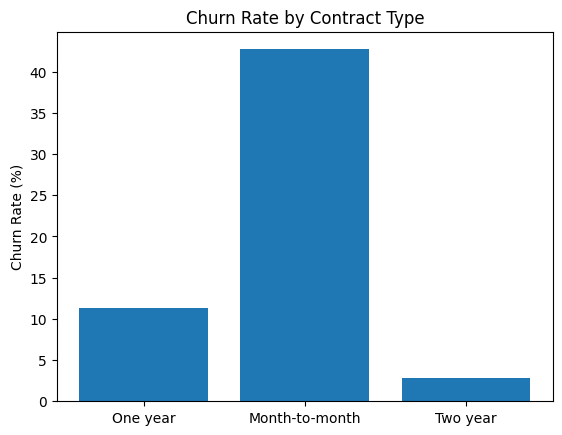

In [28]:
import matplotlib.pyplot as plt

contract_churn = con.execute("""
    SELECT
        Contract,
        100.0 * SUM(CASE WHEN "Churn Label" = 'Yes' THEN 1 ELSE 0 END) / COUNT(*) AS churn_rate
    FROM df
    GROUP BY Contract
""").df()

plt.figure()
plt.bar(contract_churn["Contract"], contract_churn["churn_rate"])
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Contract Type")
plt.show()

Insight:
Churn is heavily concentrated in month-to-month contracts, with a churn rate of over 40%, while long-term contracts (especially two-year) show very strong retention.

Interpretation:
This indicates that churn is primarily driven by contract structure rather than product dissatisfaction. Long-term commitment acts as a strong retention mechanism.

C:\Users\zirve\AppData\Local\Temp\ipykernel_7348\1487921902.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


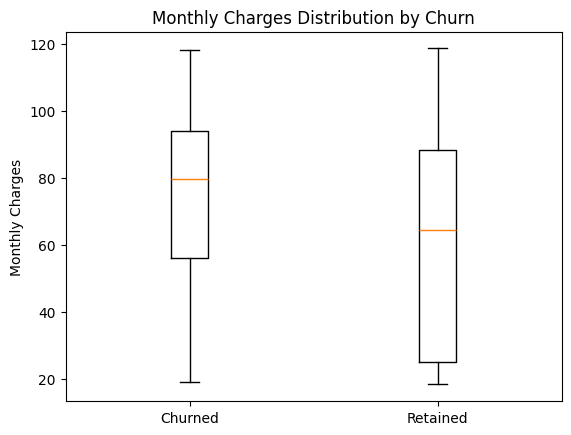

In [29]:
charges = con.execute("""
    SELECT
        "Churn Label",
        "Monthly Charges"
    FROM df
""").df()

plt.figure()
plt.boxplot(
    [charges[charges["Churn Label"]=="Yes"]["Monthly Charges"],
     charges[charges["Churn Label"]=="No"]["Monthly Charges"]],
    labels=["Churned", "Retained"]
)
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges Distribution by Churn")
plt.show()

Insight:
Customers who churn pay significantly higher monthly charges compared to retained customers.

Interpretation:
This suggests that price sensitivity plays a major role in churn. Higher-priced plans increase churn risk unless customers are locked into long-term contracts or perceive sufficient value.

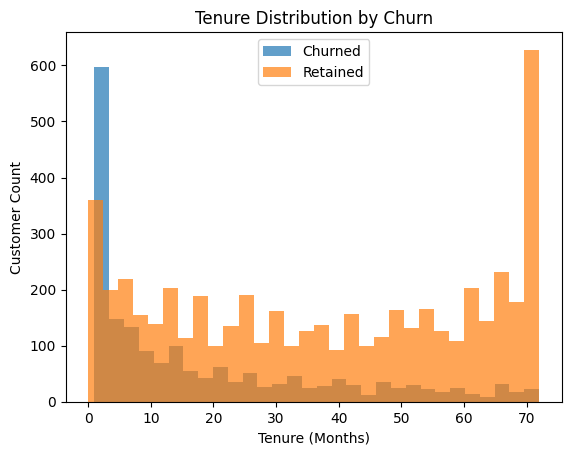

In [31]:
tenure = con.execute("""
    SELECT
        "Churn Label",
        "Tenure Months"
    FROM df
""").df()

plt.figure()
plt.hist(
    tenure[tenure["Churn Label"]=="Yes"]["Tenure Months"],
    bins=30,
    alpha=0.7,
    label="Churned"
)
plt.hist(
    tenure[tenure["Churn Label"]=="No"]["Tenure Months"],
    bins=30,
    alpha=0.7,
    label="Retained"
)
plt.xlabel("Tenure (Months)")
plt.ylabel("Customer Count")
plt.title("Tenure Distribution by Churn")
plt.legend()
plt.show()

Insight:
Churned customers tend to leave much earlier than retained customers, with a strong concentration in the first 12–18 months.

Interpretation:
This highlights that churn is an early-stage problem. Customers who survive the initial period are significantly more likely to remain long-term.